<a href="https://colab.research.google.com/github/farshadabdulazeez/deep-learning-basics/blob/main/improving_neural_networks_with_Regularization_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons  # To generate a dataset
import seaborn as sns
from mlxtend.plotting import plot_decision_regions  # For visualizing decision boundaries

# Importing TensorFlow and Keras for building the models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

**Step 1: Generate synthetic dataset using make_moons**

In [4]:
# The make_moons function creates a two-dimensional binary classification dataset
X, y = make_moons(100, noise=0.25, random_state=2)

**Visualizing the dataset**


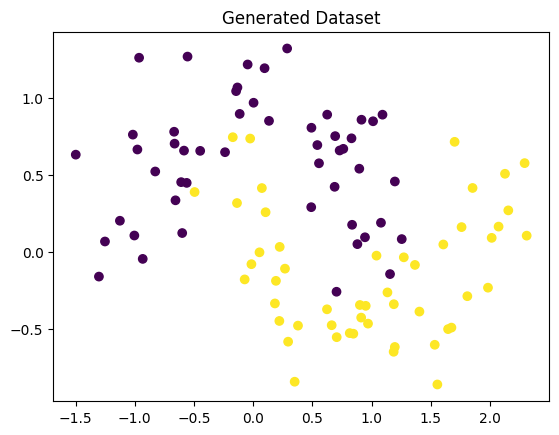

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Generated Dataset")
plt.show()

**Step 2: Building and training a simple ANN model without regularization**

In [6]:
model1 = Sequential()

# Adding layers to the model
model1.add(Dense(128, input_dim=2, activation="relu"))  # First hidden layer
model1.add(Dense(128, activation="relu"))  # Second hidden layer
model1.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Displaying the model architecture**

In [7]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the model**

In [8]:
adam = Adam(learning_rate=0.01)  # Optimizer
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

**Training the model**

In [9]:
history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)  # Train on 80%, validate on 20%

**Visualizing the decision boundary of the model without regularization**

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


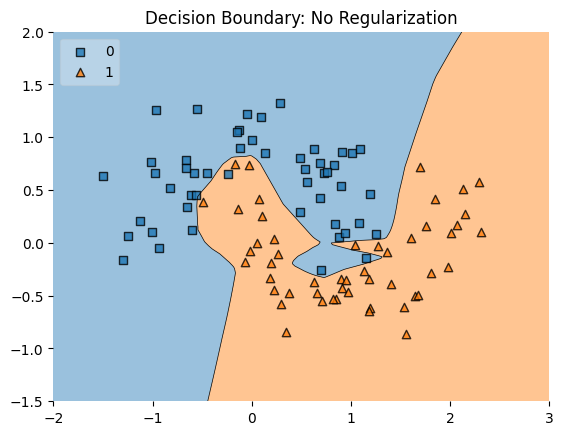

In [8]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title("Decision Boundary: No Regularization")
plt.show()

**Plotting the training and validation loss**

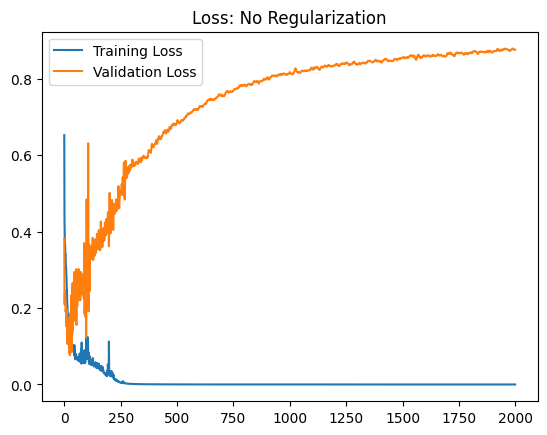

In [9]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title("Loss: No Regularization")
plt.legend()
plt.show()

**Step 3: Building and training an ANN model with L1 (Lasso) regularization**


In [17]:
model2 = Sequential()

# Adding layers with L1 regularization
from tensorflow.keras.regularizers import l1

model2.add(Dense(128, input_dim=2, activation="relu", kernel_regularizer=l1(0.001)))
model2.add(Dense(128, activation="relu", kernel_regularizer=l1(0.001)))
model2.add(Dense(1, activation='sigmoid'))


**Displaying the model architecture**

In [18]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

**Define a new optimizer instance for model2**


In [19]:
# Importing the necessary optimizer
from tensorflow.keras.optimizers import Adam

# Define a new optimizer instance for model2
adam2 = Adam(learning_rate=0.01)

**Compiling the model**

In [20]:
model2.compile(loss='binary_crossentropy', optimizer=adam2, metrics=['accuracy'])

In [21]:
history2 = model2.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)  # Train on 80%, validate on 20%

**Visualizing the decision boundary of the model with L1 regularization**


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


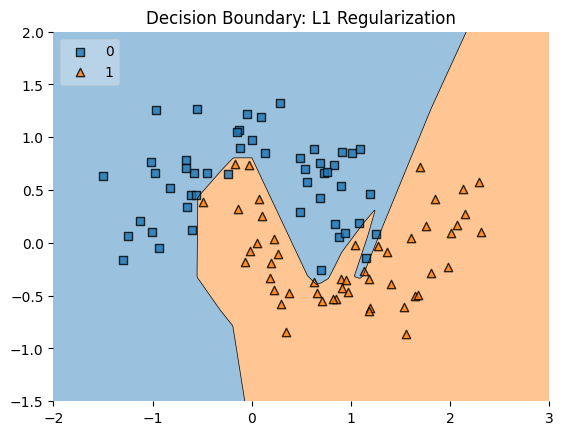

In [22]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title("Decision Boundary: L1 Regularization")
plt.show()

**Plotting the training and validation loss**

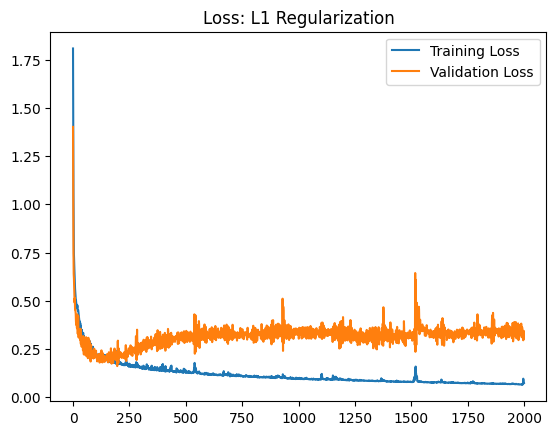

In [23]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title("Loss: L1 Regularization")
plt.legend()
plt.show()

**Step 4: Comparing weights in the first layer between the two models**


In [24]:
model1_weight_layer1 = model1.get_weights()[0].flatten()  # Flattening weights for visualization
model2_weight_layer1 = model2.get_weights()[0].flatten()

**Boxplot to compare weight distributions**

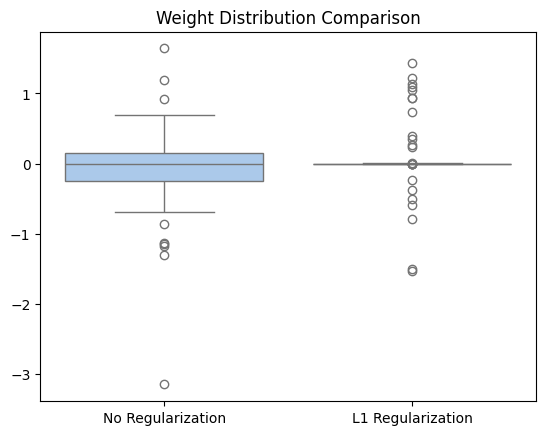

In [25]:
sns.boxplot(data=[model1_weight_layer1, model2_weight_layer1], palette="pastel")
plt.xticks([0, 1], ['No Regularization', 'L1 Regularization'])
plt.title("Weight Distribution Comparison")
plt.show()


**Distribution plot of the weights**


<ipython-input-26-234e8d27297a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model1_weight_layer1, label='No Regularization', shade=True)
<ipython-input-26-234e8d27297a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model2_weight_layer1, label='L1 Regularization', shade=True)


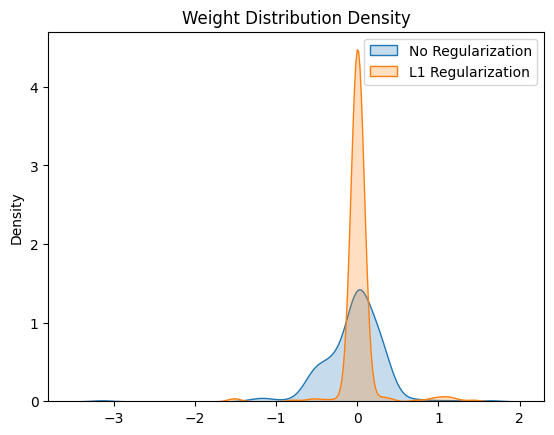

In [26]:
sns.kdeplot(model1_weight_layer1, label='No Regularization', shade=True)
sns.kdeplot(model2_weight_layer1, label='L1 Regularization', shade=True)
plt.title("Weight Distribution Density")
plt.legend()
plt.show()

**Step 5: Adding ElasticNet Regularization (L1 + L2)**

In [28]:
model3 = Sequential()

# Adding layers with ElasticNet regularization
model3.add(Dense(128, input_dim=2, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(0.001, 0.001)))
model3.add(Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(0.001, 0.001)))
model3.add(Dense(1, activation='sigmoid'))

**Displaying the model architecture**

In [29]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

**Define a new optimizer instance for model3**


In [32]:
adam3 = Adam(learning_rate=0.01)

**Compiling the model**

In [34]:
model3.compile(loss='binary_crossentropy', optimizer=adam3, metrics=['accuracy'])

**Training the model**


In [35]:
history3 = model3.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

**Visualizing the decision boundary of the model with ElasticNet regularization**


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


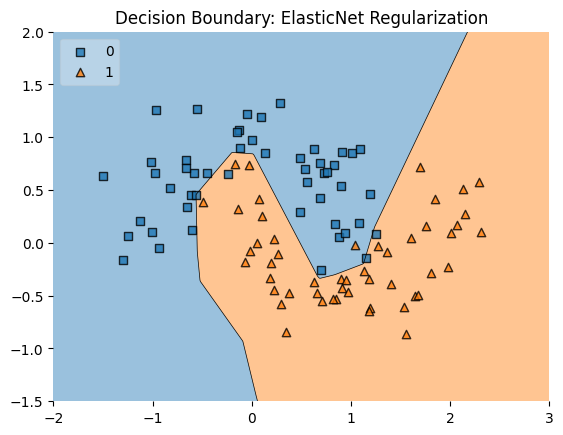

In [36]:
plot_decision_regions(X, y.astype('int'), clf=model3, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title("Decision Boundary: ElasticNet Regularization")
plt.show()

**Plotting the training and validation loss for ElasticNet**

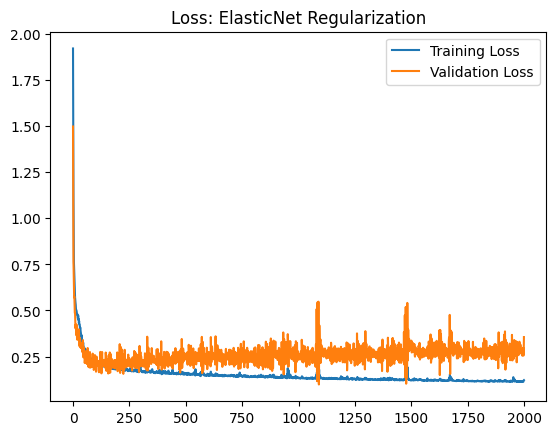

In [37]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title("Loss: ElasticNet Regularization")
plt.legend()
plt.show()

**Step 5: Adding L2 Regularization**

In [38]:
from tensorflow.keras.regularizers import l2

# Define model4 with L2 regularization
model4 = Sequential()

# Adding layers with L2 regularization
model4.add(Dense(128, input_dim=2, activation="relu", kernel_regularizer=l2(0.03)))
model4.add(Dense(128, activation="relu", kernel_regularizer=l2(0.03)))
model4.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Define a new optimizer instance for model4**

In [39]:
adam4 = Adam(learning_rate=0.01)

**Compile the model with the new optimizer**

In [40]:
model4.compile(loss='binary_crossentropy', optimizer=adam4, metrics=['accuracy'])

**Train the model**


In [41]:
history4 = model4.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

**Visualizing Decision Regions for model4**

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


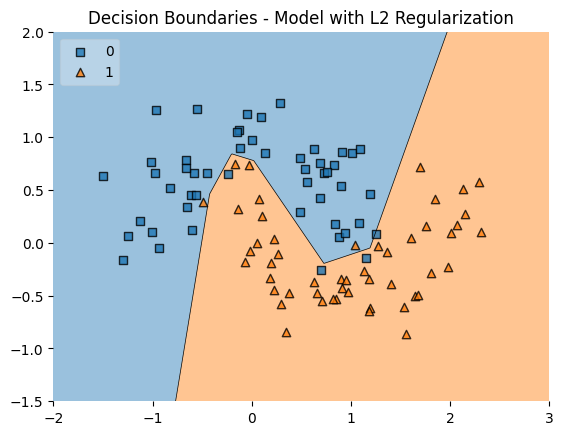

In [42]:
plot_decision_regions(X, y.astype('int'), clf=model4, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title("Decision Boundaries - Model with L2 Regularization")
plt.show()

**Plot Training and Validation Loss**

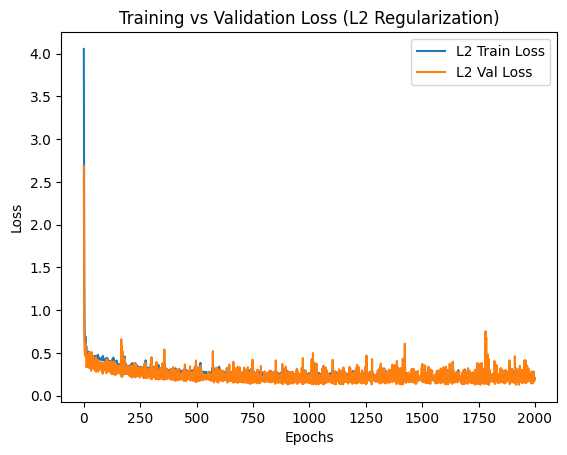

In [43]:
plt.plot(history4.history['loss'], label="L2 Train Loss")
plt.plot(history4.history['val_loss'], label="L2 Val Loss")
plt.title("Training vs Validation Loss (L2 Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Visualizing Weights**

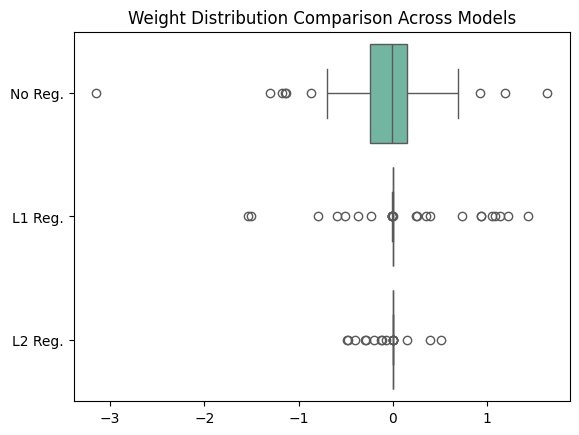

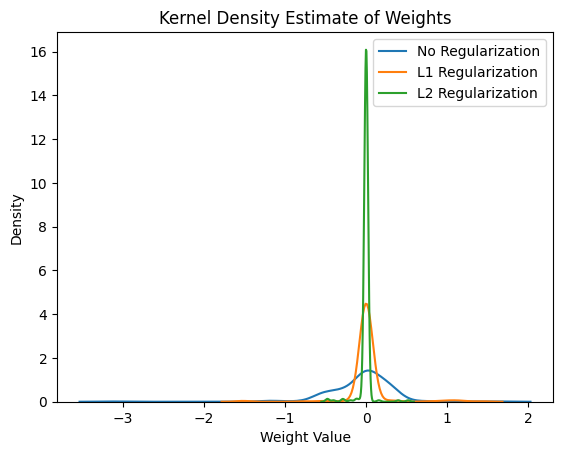

In [44]:
model4_weight_layer1 = model4.get_weights()[0].reshape(256)

# Compare distributions across models
sns.boxplot(data=[model1.get_weights()[0].reshape(256),
                  model2.get_weights()[0].reshape(256),
                  model4_weight_layer1],
            orient='h',
            palette="Set2")
plt.yticks([0, 1, 2], ["No Reg.", "L1 Reg.", "L2 Reg."])
plt.title("Weight Distribution Comparison Across Models")
plt.show()

sns.kdeplot(model1.get_weights()[0].reshape(256), label="No Regularization")
sns.kdeplot(model2.get_weights()[0].reshape(256), label="L1 Regularization")
sns.kdeplot(model4_weight_layer1, label="L2 Regularization")
plt.title("Kernel Density Estimate of Weights")
plt.xlabel("Weight Value")
plt.ylabel("Density")
plt.legend()
plt.show()

**Plot Validation Loss Comparison**


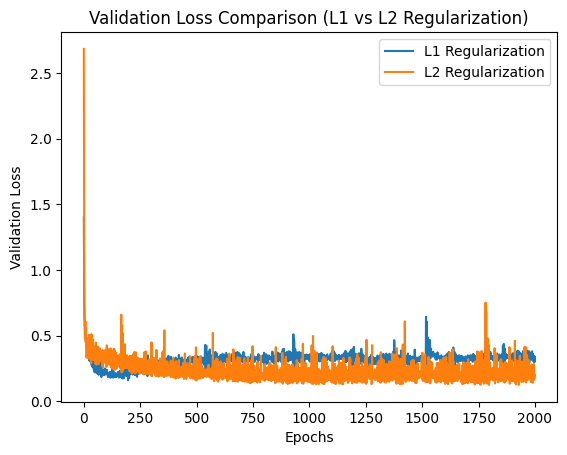

In [48]:
plt.plot(history2.history['val_loss'], label="L1 Regularization")
plt.plot(history4.history['val_loss'], label="L2 Regularization")
plt.title("Validation Loss Comparison (L1 vs L2 Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

# **Conclusion:**

**1. Without regularization, the model may overfit, as evident from the decision boundary and validation loss**.

**2. L1 regularization (Lasso) encourages sparsity in weights, leading to simpler models and reduced overfitting**.

**3. ElasticNet combines L1 and L2 regularization, balancing sparsity and weight distribution, yielding stable and generalized models**.

**4. L2 regularization (Ridge) penalizes large weights, helping to control overfitting by smoothing the model, and is often more effective in Artificial Neural Networks (ANNs) due to its ability to better handle the complexity of deep learning models and prevent excessively large weight updates**.

**5. Regularization techniques improve the model's ability to generalize by penalizing overly complex weight configurations, with L2 being especially beneficial for ANNs in maintaining smoothness and reducing the risk of overfitting**.